# Assessing important information:
- correlation among weather features and NDVI.

# 1. EDA on weather_merged_features, NDVI & harvest data
________________________

In [15]:
# Read weather_features
import pandas as pd
import seaborn as sns

weather_data = pd.read_csv('../datasets/weather_merged_features.csv').copy()
weather_data.describe()

,year,ET0_sum_veg,ET0_sum_rep,PTI_sum_veg,PTI_sum_rep,PTU_sum_veg,PTU_sum_rep,SWD_sum_veg,SWD_mean_veg,SWD_sum_rep,...,T2M_days_ideal_vegetative,T2M_days_low_vegetative,T2M_days_extremely_low_vegetative,T2M_days_ideal_reproductive,T2M_days_low_reproductive,T2M_days_extremely_low_reproductive,T2M_5,T2M_6,T2M_7,T2M_8
count,1090.0000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,...,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,2018.5000,252.400795,284.914540,13.005287,45.819313,3887.228002,10531.695274,1126.394743,6.121711,1030.269752,...,3.753211,20.841284,36.405505,15.629358,33.074312,13.296330,10.787983,14.883883,19.757827,20.481186
std,2.8736,16.768381,21.479437,2.523530,5.288889,921.860009,1475.926118,57.943829,0.314912,65.121590,...,3.221059,5.723306,6.352716,9.545323,8.674132,7.940047,0.833972,1.216041,1.148895,1.634095
min,2014.0000,211.001604,235.169911,3.473957,33.915292,1345.963200,7009.832100,984.840000,5.352391,878.130000,...,0.000000,2.000000,16.000000,0.000000,10.000000,0.000000,8.094839,11.615000,15.972581,16.647742
25%,2016.0000,240.710056,271.046612,11.536352,42.226385,3183.261350,9508.255400,1088.655000,5.916603,989.510000,...,1.000000,17.000000,32.000000,8.000000,26.000000,7.000000,10.239355,13.968750,18.892258,19.367742
50%,2018.5000,251.172459,283.757891,13.007037,45.180174,3713.274800,10264.338300,1118.190000,6.077120,1031.390000,...,3.000000,20.000000,37.000000,13.000000,33.000000,13.000000,10.791613,14.814500,19.639677,20.289677
75%,2021.0000,263.136683,299.465897,14.401416,49.589016,4700.019600,11259.656375,1160.820000,6.308804,1066.390000,...,6.000000,24.000000,40.000000,21.000000,40.000000,19.000000,11.323548,15.981333,20.649435,21.437419
max,2023.0000,301.835447,361.133710,22.262111,65.503924,6023.784200,15889.294000,1277.440000,6.942609,1214.500000,...,14.000000,44.000000,59.000000,46.000000,51.000000,39.000000,13.346129,17.890667,22.894516,26.262581


In [16]:
# Read target dataset (10a当たり収量)
harvest_data = pd.read_csv("../datasets/filtered_harvest.csv").copy()
harvest_data = harvest_data.rename(columns={'10a当たり収量': 'Productivity'})
harvest_data = harvest_data[["市町村コード", "市町村名", "年", "Productivity", '作付面積']]
harvest_data = harvest_data.rename(columns={"年": "year"})
harvest_data.describe()

,市町村コード,year,Productivity,作付面積
count,1051.000000,1051.000000,1051.000000,1051.000000
mean,393.284491,2018.473834,534.512845,970.649857
std,125.152204,2.869218,53.334315,1214.482778
min,100.000000,2014.000000,338.000000,2.000000
25%,303.000000,2016.000000,497.000000,128.000000
50%,408.000000,2018.000000,534.000000,457.000000
75%,465.000000,2021.000000,575.000000,1480.000000
max,631.000000,2023.000000,669.000000,7660.000000


In [17]:
# Read and merge NDVI data
NDVI_data = pd.read_csv('../datasets/filtered_NDVI_data.csv').copy()

# Drop NDVI, NDVI_ff
NDVI_data = NDVI_data.drop(columns=['NDVI', 'NDVI_ff'])

# Define the columns to pivot
pivot_cols = ["NDVI_li"]

# Define id columns
id_cols = ['市町村名', 'year', '緯度', '経度']

# Fill missing values in '緯度' and '経度' within each 市町村名 and year group
NDVI_data[['緯度', '経度']] = NDVI_data.groupby(['市町村名', 'year'])[['緯度', '経度']].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Pivot the data using the specified columns
NDVI_data_pivoted = NDVI_data.pivot(index=id_cols, 
                                    columns='month',
                                    values=pivot_cols)

# Flatten the MultiIndex columns
NDVI_data_pivoted.columns = [f"{var}_{month}" for var, month in NDVI_data_pivoted.columns]

# Reset index to make it a normal DataFrame
NDVI_data_pivoted = NDVI_data_pivoted.reset_index()

# Display the result
display(NDVI_data_pivoted)

,市町村名,year,緯度,経度,NDVI_li_5,NDVI_li_6,NDVI_li_7,NDVI_li_8,NDVI_li_9,NDVI_li_10
0,せたな町,2014,42.417191,139.883005,0.684677,0.734460,0.810875,0.814145,0.715879,0.632963
1,せたな町,2015,42.417191,139.883005,0.700187,0.770812,0.803257,0.792577,0.744357,0.632762
2,せたな町,2016,42.417191,139.883005,0.721679,0.779684,0.818091,0.822354,0.730327,0.653433
3,せたな町,2017,42.417191,139.883005,0.682454,0.760709,0.841124,0.819332,0.748045,0.558361
4,せたな町,2018,42.417191,139.883005,0.669000,0.741145,0.826358,0.818799,0.765253,0.678507
...,...,...,...,...,...,...,...,...,...,...
1085,黒松内町,2019,42.667876,140.307541,0.776213,0.844108,0.875901,0.867211,0.834770,0.709611
1086,黒松内町,2020,42.667876,140.307541,0.761548,0.836803,0.856628,0.876453,0.820599,0.663384
1087,黒松内町,2021,42.667876,140.307541,0.771358,0.835759,0.873940,0.871291,0.815399,0.728427
1088,黒松内町,2022,42.667876,140.307541,0.758081,0.846137,0.884323,0.846565,0.843497,0.673592


## Merge weather_data, NDVI_data & harvest_data
_____________________

In [18]:
weather_harvest = pd.merge(
    harvest_data,
    weather_data,
    on=['year', '市町村名'],
    how='inner'
)

display(weather_harvest)

,市町村コード,市町村名,year,Productivity,作付面積,ET0_sum_veg,ET0_sum_rep,PTI_sum_veg,PTI_sum_rep,PTU_sum_veg,...,T2M_days_ideal_vegetative,T2M_days_low_vegetative,T2M_days_extremely_low_vegetative,T2M_days_ideal_reproductive,T2M_days_low_reproductive,T2M_days_extremely_low_reproductive,T2M_5,T2M_6,T2M_7,T2M_8
0,100.0,札幌市,2014,515.0,27.0,258.941874,298.568723,12.927276,43.871819,4855.5275,...,5,28,28,8,44,10,10.838065,16.080667,19.841613,19.754516
1,202.0,函館市,2014,480.0,65.0,249.538273,282.462481,15.378207,53.840957,4715.3760,...,7,26,28,21,37,4,11.528710,16.240000,20.937419,21.402258
2,203.0,小樽市,2014,549.0,9.0,245.770292,289.788063,13.777494,44.363204,4594.2156,...,5,28,28,8,44,10,10.838065,16.080667,19.841613,19.754516
3,204.0,旭川市,2014,609.0,6430.0,262.864139,286.649830,14.909451,42.639571,5594.0749,...,14,17,30,7,44,11,10.411290,17.221667,19.958065,19.342903
4,205.0,室蘭市,2014,520.0,5.0,241.891391,276.434988,10.029255,47.669873,3256.1812,...,0,20,41,9,45,8,9.877419,14.648333,19.399032,20.346774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,602.0,平取町,2023,535.0,431.0,257.661916,307.861060,10.926435,51.290311,3616.2573,...,3,19,39,36,23,3,10.288065,15.249000,20.534839,23.970645
1047,604.0,新冠町,2023,495.0,136.0,254.559037,301.562881,10.406584,46.844554,3464.8180,...,4,18,39,29,27,6,9.692258,15.079000,19.979355,22.699355
1048,607.0,浦河町,2023,486.0,22.0,251.304828,304.326640,8.815014,49.493556,2933.9510,...,3,12,46,34,22,6,9.468710,14.552667,19.791935,23.830323
1049,608.0,様似町,2023,500.0,21.0,247.752267,296.838282,7.924520,45.091738,2684.2442,...,1,13,47,28,23,11,8.929355,14.170333,18.878065,22.738710


In [19]:
# Merge weather_harvest with NDVI_data_pivoted
weather_NDVI_harvest = pd.merge(
    weather_harvest,
    NDVI_data_pivoted,
    on=['year', '市町村名'],
    how='inner'
)

weather_NDVI_harvest.info()
weather_NDVI_harvest.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1050
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   市町村コード                               1051 non-null   float64
 1   市町村名                                 1051 non-null   object 
 2   year                                 1051 non-null   int64  
 3   Productivity                         1051 non-null   float64
 4   作付面積                                 1051 non-null   float64
 5   ET0_sum_veg                          1051 non-null   float64
 6   ET0_sum_rep                          1051 non-null   float64
 7   PTI_sum_veg                          1051 non-null   float64
 8   PTI_sum_rep                          1051 non-null   float64
 9   PTU_sum_veg                          1051 non-null   float64
 10  PTU_sum_rep                          1051 non-null   float64
 11  SWD_sum_veg                   

,市町村コード,year,Productivity,作付面積,ET0_sum_veg,ET0_sum_rep,PTI_sum_veg,PTI_sum_rep,PTU_sum_veg,PTU_sum_rep,...,T2M_7,T2M_8,緯度,経度,NDVI_li_5,NDVI_li_6,NDVI_li_7,NDVI_li_8,NDVI_li_9,NDVI_li_10
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,...,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,393.284491,2018.473834,534.512845,970.649857,252.464575,284.982464,13.042128,45.856723,3892.926082,10534.907648,...,19.763278,20.483892,43.143400,141.641536,0.611084,0.716116,0.757054,0.735294,0.669654,0.564268
std,125.152204,2.869218,53.334315,1214.482778,16.833548,21.501449,2.536902,5.312156,924.512534,1477.104793,...,1.146042,1.635615,0.736897,0.947127,0.116938,0.101834,0.092875,0.099695,0.107504,0.095365
min,100.000000,2014.000000,338.000000,2.000000,211.001604,236.145584,3.473957,33.915292,1345.963200,7009.832100,...,15.972581,16.647742,41.483942,139.512172,0.242342,0.280029,0.326006,0.264725,0.308411,0.269779
25%,303.000000,2016.000000,497.000000,128.000000,240.710056,271.046612,11.638429,42.253811,3183.221750,9508.255400,...,18.892258,19.367742,42.584939,140.794788,0.511838,0.644177,0.703118,0.671329,0.585523,0.493756
50%,408.000000,2018.000000,534.000000,457.000000,251.172459,283.757891,13.047195,45.232223,3717.601800,10264.338300,...,19.639677,20.289677,43.171677,141.784299,0.609023,0.711965,0.771702,0.745150,0.677428,0.563186
75%,465.000000,2021.000000,575.000000,1480.000000,263.151253,299.449630,14.525677,49.612001,4700.328000,11252.143250,...,20.610968,21.437419,43.727261,142.354421,0.714423,0.801549,0.827282,0.814298,0.760120,0.637006
max,631.000000,2023.000000,669.000000,7660.000000,301.835447,361.133710,22.262111,65.503924,6023.784200,15889.294000,...,22.894516,26.262581,44.722419,144.172737,0.867468,0.905389,0.944602,0.896296,0.878539,0.822520


# Check correlation
_______________

C:\Users\othon\anaconda3\envs\ml_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.draw()
C:\Users\othon\anaconda3\envs\ml_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 30010 (\N{CJK UNIFIED IDEOGRAPH-753A}) missing from current font.
  fig.canvas.draw()
C:\Users\othon\anaconda3\envs\ml_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from current font.
  fig.canvas.draw()
C:\Users\othon\anaconda3\envs\ml_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  fig.canvas.draw()
C:\Users\othon\anaconda3\envs\ml_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.draw()
C:\Users\othon\anaconda3\envs\ml_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Gl

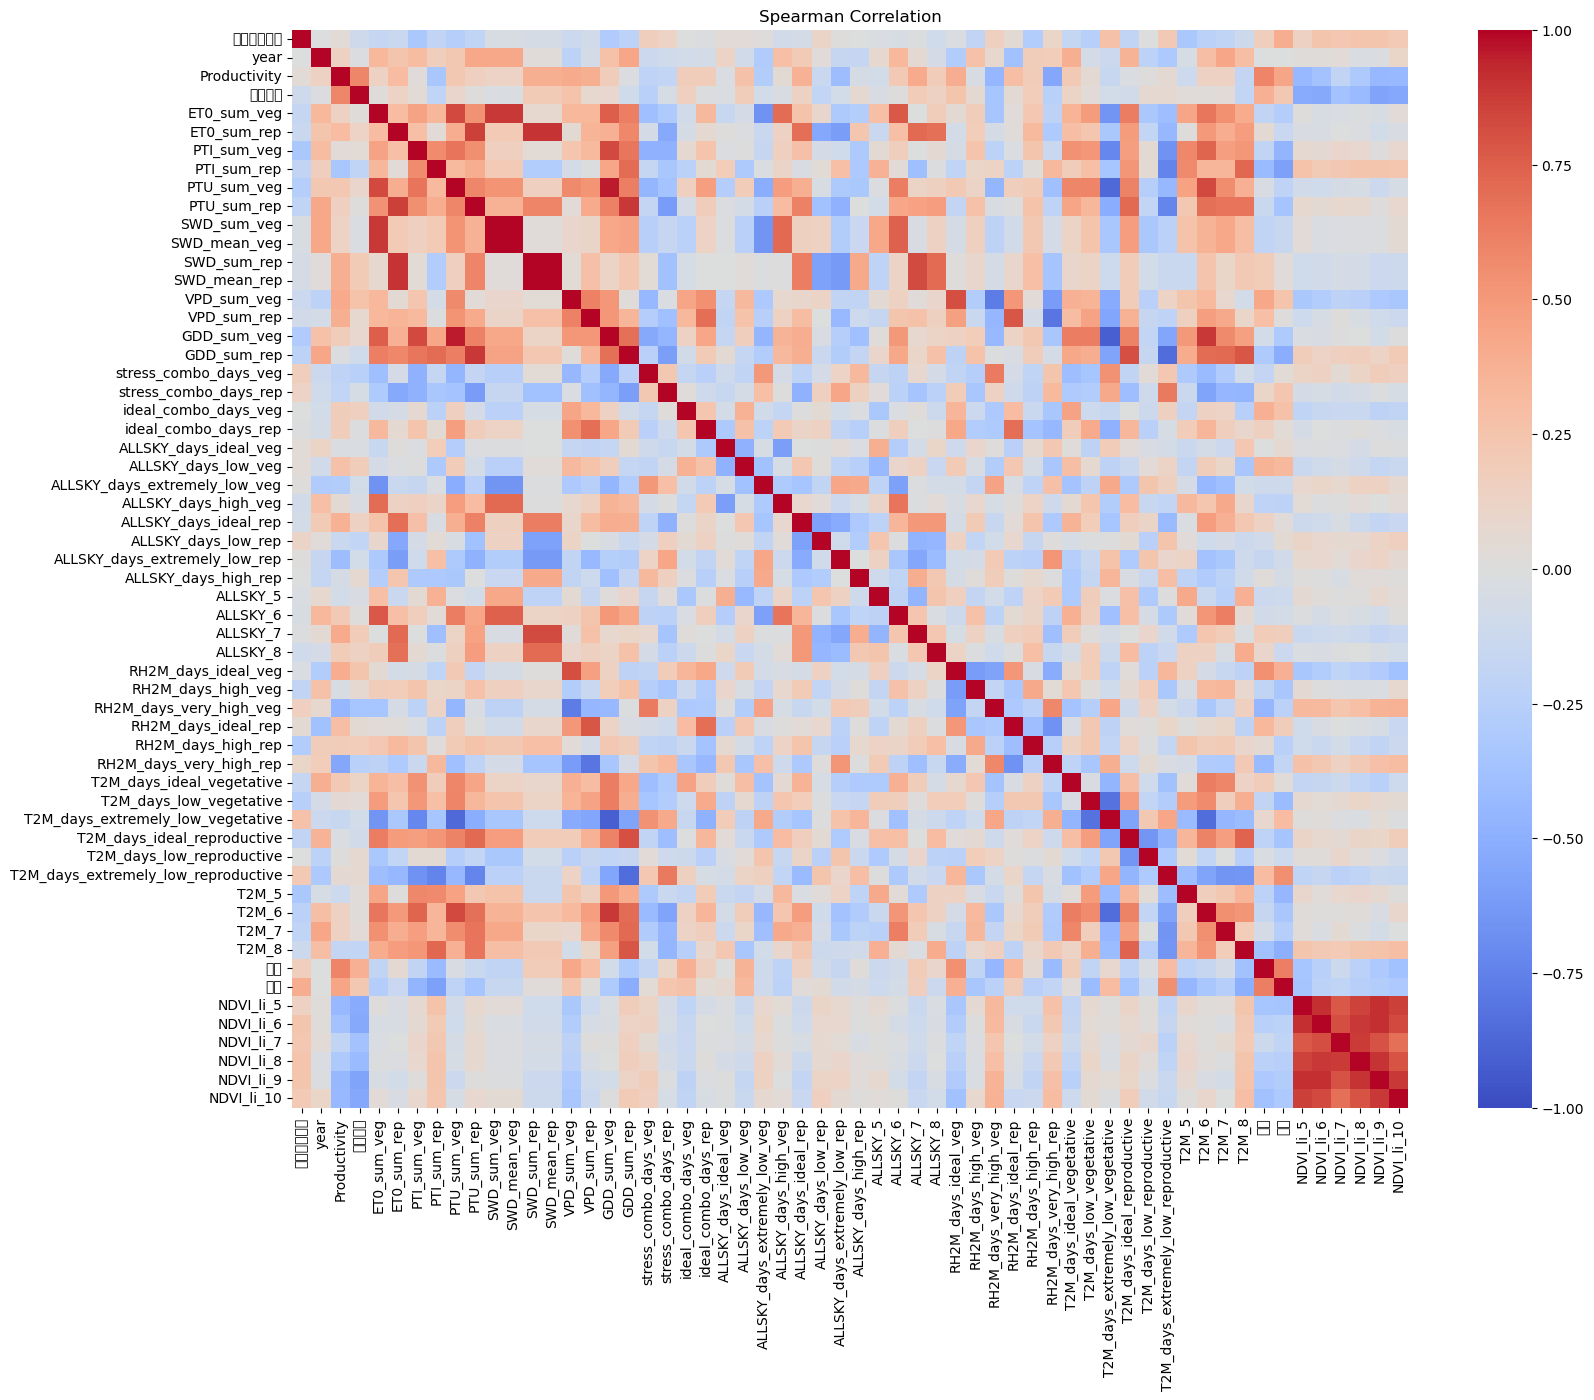

In [20]:
# Check correlation keeping daily granurality
import matplotlib.pyplot as plt

numeric_cols = weather_NDVI_harvest.select_dtypes(include='number').columns

corr_spearman = weather_NDVI_harvest[numeric_cols].corr(method='spearman')

# Plot
plt.figure(figsize=(18, 14))
sns.heatmap(corr_spearman, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation")
plt.show()

# Boxplot & barplot

C:\Users\othon\AppData\Local\Temp\ipykernel_14728\2844306930.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 1, 2)


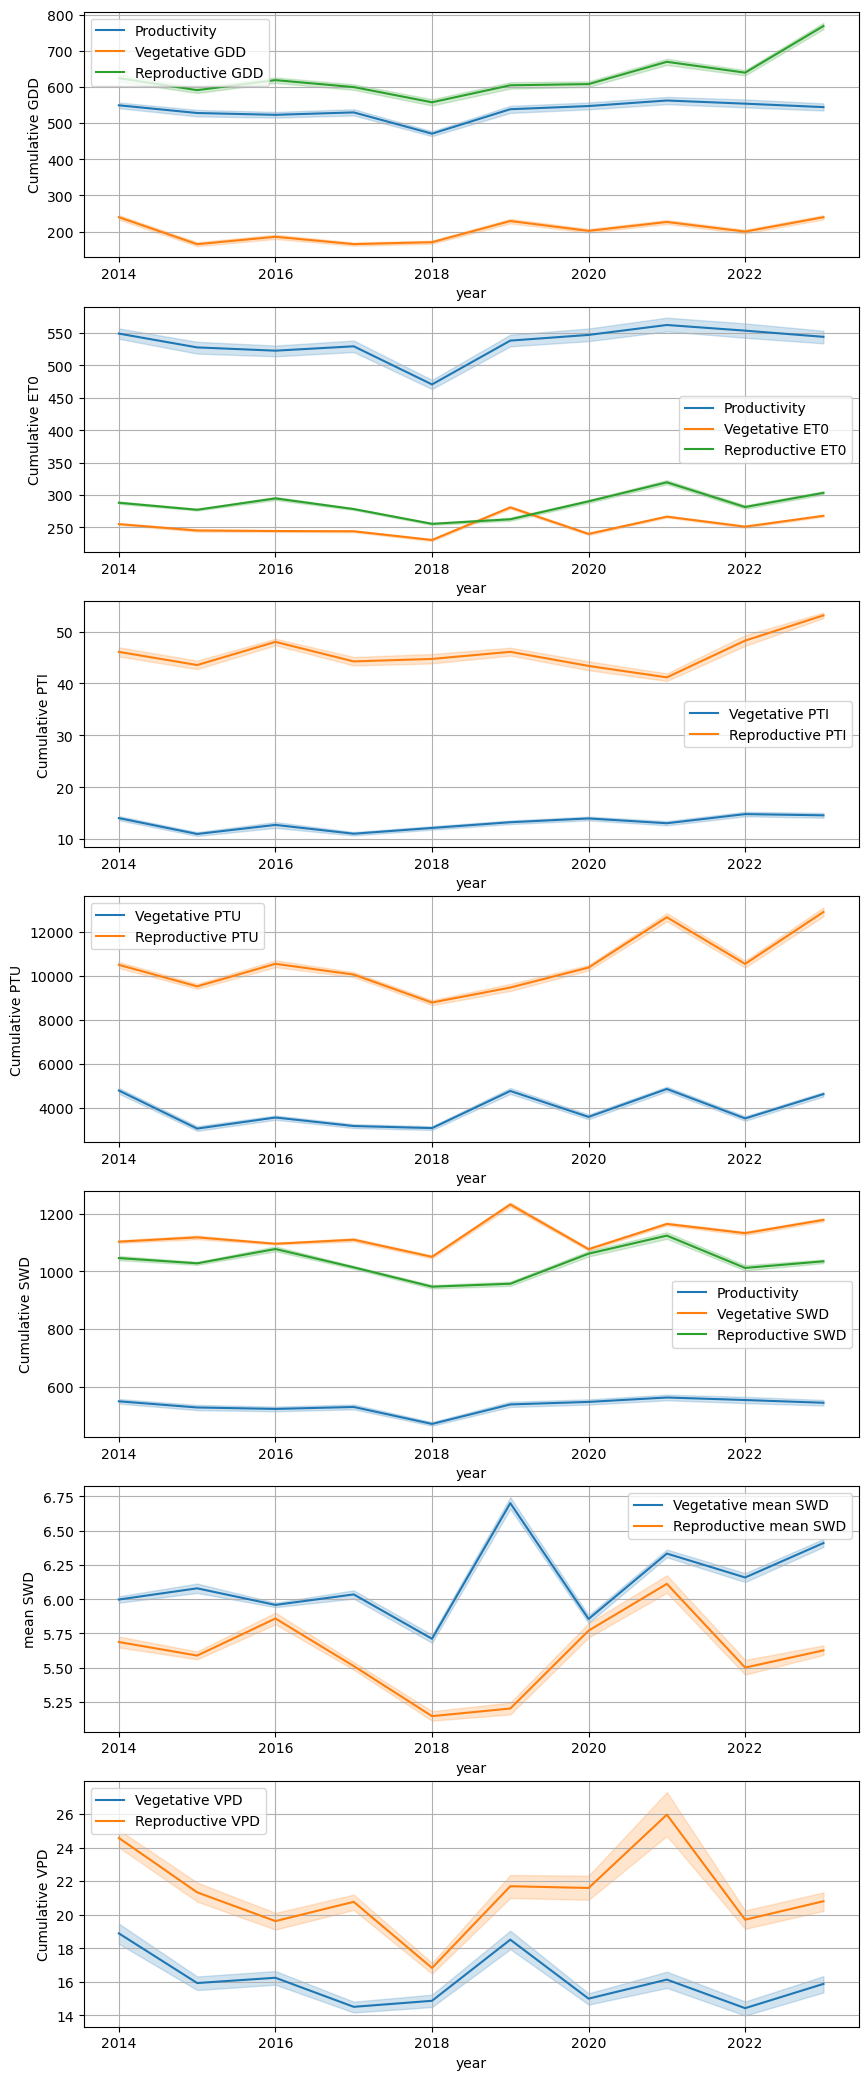

In [21]:
# 1. GDD trends over time
plt.figure(figsize=(10, 30))

plt.subplot(2, 1, 1)
sns.boxplot(data=weather_NDVI_harvest, x='year', y='Productivity')
plt.ylabel("Productivity")

plt.subplot(8, 1, 2)
sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='GDD_sum_veg', label='Vegetative GDD')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='GDD_sum_rep', label='Reproductive GDD')
plt.ylabel("Cumulative GDD")
plt.grid(True)

plt.subplot(8, 1, 3)
sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='ET0_sum_veg', label='Vegetative ET0')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='ET0_sum_rep', label='Reproductive ET0')
plt.ylabel("Cumulative ET0")
plt.grid(True)

plt.subplot(8, 1, 4)
#sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='PTI_sum_veg', label='Vegetative PTI')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='PTI_sum_rep', label='Reproductive PTI')
plt.ylabel("Cumulative PTI")
plt.grid(True)

plt.subplot(8, 1, 5)
#sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='PTU_sum_veg', label='Vegetative PTU')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='PTU_sum_rep', label='Reproductive PTU')
plt.ylabel("Cumulative PTU")
plt.grid(True)

plt.subplot(8, 1, 6)
sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='SWD_sum_veg', label='Vegetative SWD')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='SWD_sum_rep', label='Reproductive SWD')
plt.ylabel("Cumulative SWD")
plt.grid(True)

plt.subplot(8, 1, 7)
#sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='SWD_mean_veg', label='Vegetative mean SWD')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='SWD_mean_rep', label='Reproductive mean SWD')
plt.ylabel("mean SWD")
plt.grid(True)

plt.subplot(8, 1, 8)
#sns.lineplot(data=weather_NDVI_harvest, x='year', y='Productivity', label='Productivity')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='VPD_sum_veg', label='Vegetative VPD')
sns.lineplot(data=weather_NDVI_harvest, x='year', y='VPD_sum_rep', label='Reproductive VPD')
plt.ylabel("Cumulative VPD")
plt.grid(True)

plt.show()

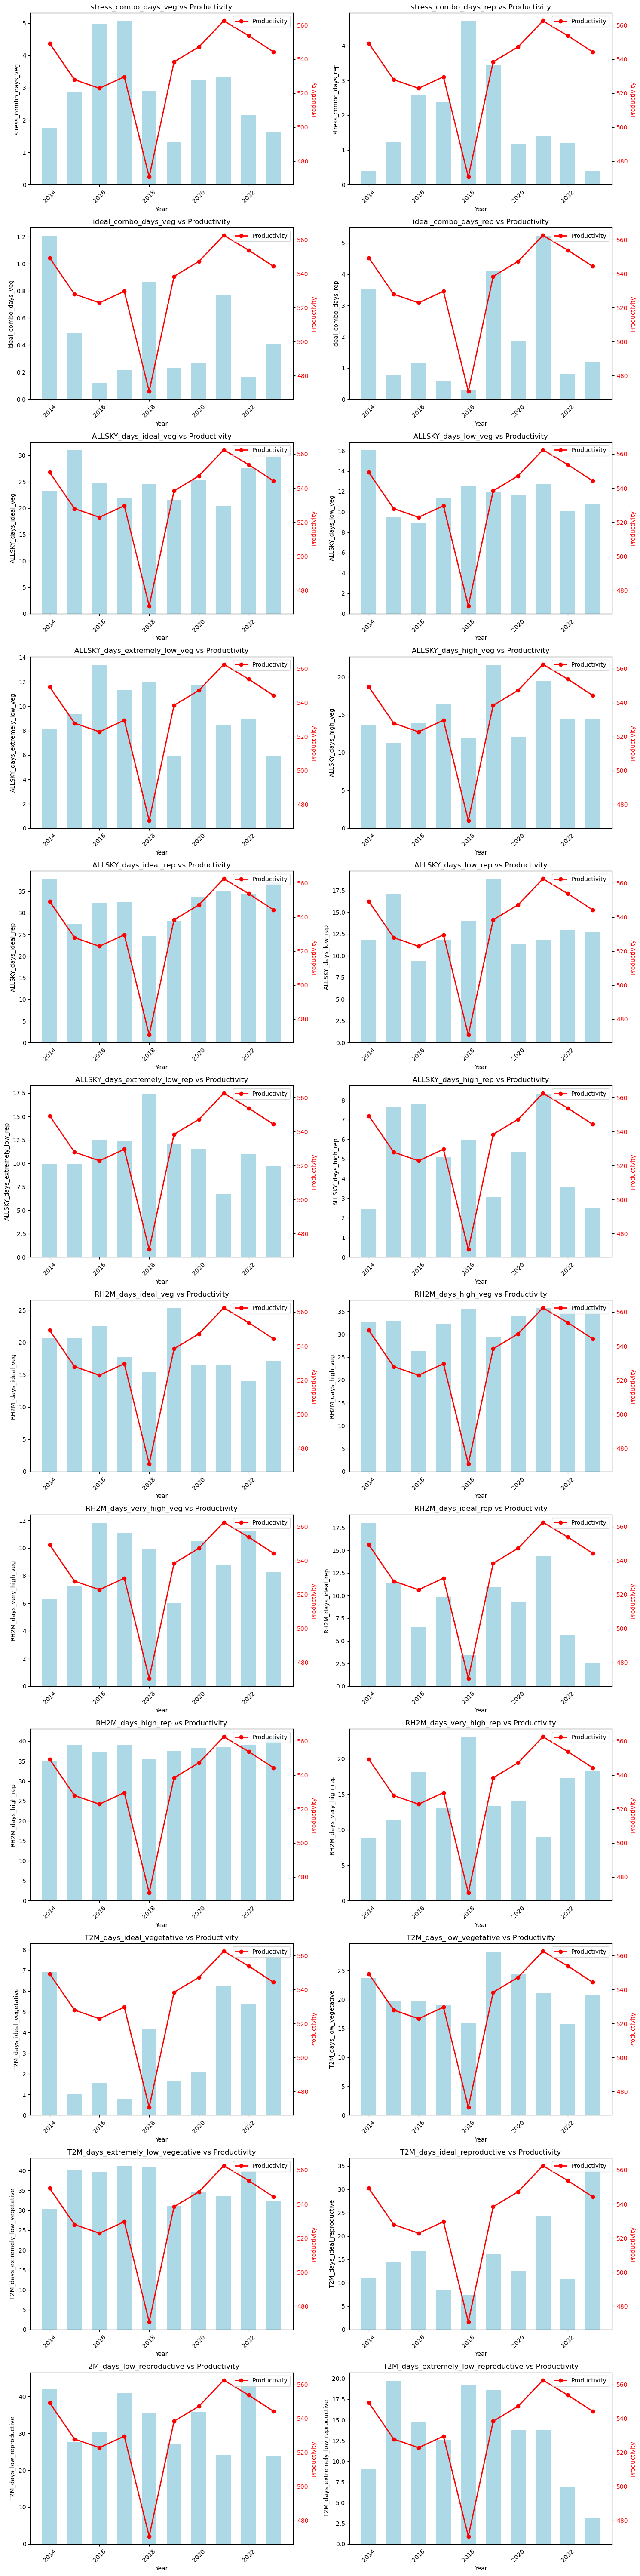

In [22]:
numeric_cols = ['stress_combo_days_veg', 'stress_combo_days_rep',
                'ideal_combo_days_veg', 'ideal_combo_days_rep', 'ALLSKY_days_ideal_veg',
                'ALLSKY_days_low_veg', 'ALLSKY_days_extremely_low_veg',
                'ALLSKY_days_high_veg', 'ALLSKY_days_ideal_rep', 'ALLSKY_days_low_rep',
                'ALLSKY_days_extremely_low_rep', 'ALLSKY_days_high_rep',
                'RH2M_days_ideal_veg', 'RH2M_days_high_veg', 'RH2M_days_very_high_veg',
                'RH2M_days_ideal_rep', 'RH2M_days_high_rep', 'RH2M_days_very_high_rep',
                'T2M_days_ideal_vegetative', 'T2M_days_low_vegetative',
                'T2M_days_extremely_low_vegetative', 'T2M_days_ideal_reproductive',
                'T2M_days_low_reproductive', 'T2M_days_extremely_low_reproductive']

fig = plt.figure(figsize=(15, 60)) 
fig.subplots_adjust(hspace=0.8, wspace=0.4)

for i, col in enumerate(numeric_cols, 1):
    ax1 = plt.subplot(12, 2, i)
    
    years = weather_NDVI_harvest['year'].unique()
    values = weather_NDVI_harvest.groupby('year')[col].mean()
    ax1.bar(years, values, color='lightblue', width=0.6)
    ax1.set_xlabel('Year', fontsize=10)
    ax1.set_ylabel(col, fontsize=10)
    ax1.set_title(f"{col} vs Productivity", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Gráfico de linha para produtividade (eixo secundário)
    ax2 = ax1.twinx()
    productivity = weather_NDVI_harvest.groupby('year')['Productivity'].mean()
    ax2.plot(years, productivity, color='red', marker='o', linewidth=2, label='Productivity')
    ax2.set_ylabel('Productivity', color='red', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 2D Histogram

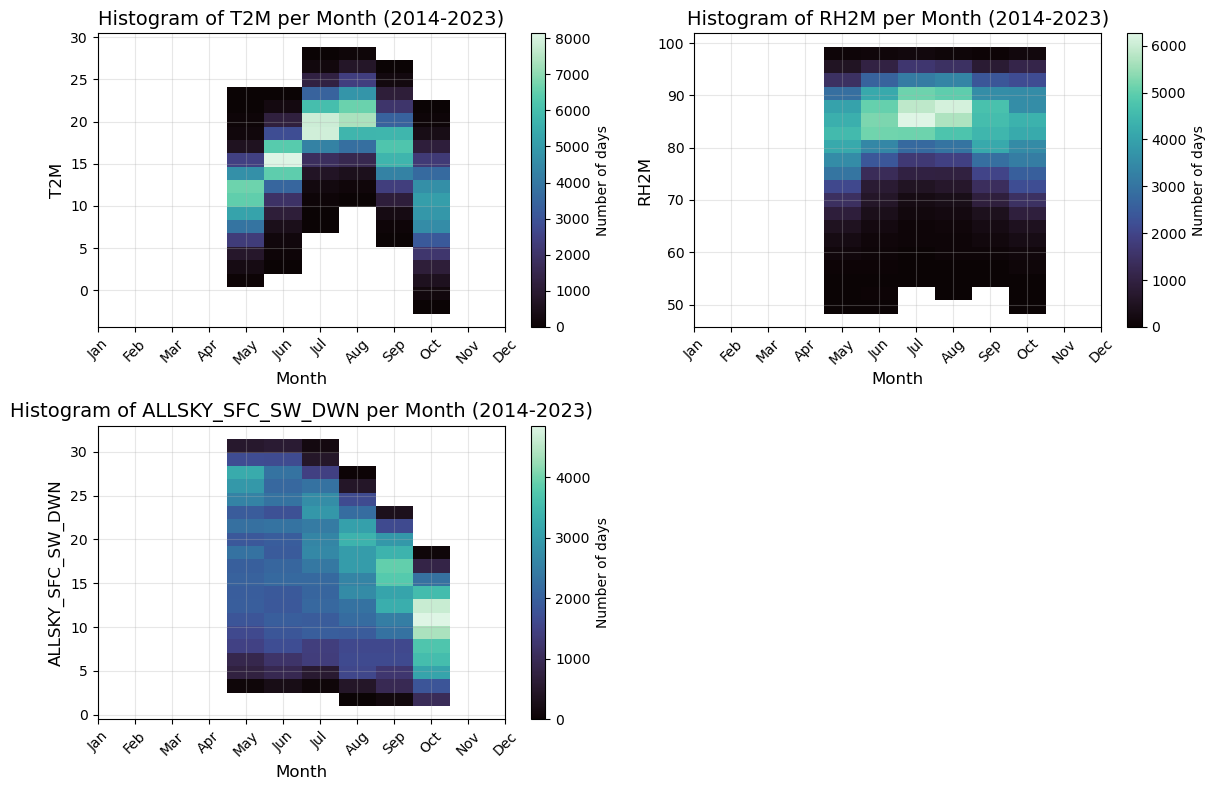

In [23]:
# 2D histogram
plt.figure(figsize=(12, 8))
weather_data = pd.read_csv("../datasets/hokkaido_weather_data.csv").copy()
filtered_weather_data = weather_data[(weather_data['month'] >= 5) & (weather_data['month'] <= 10)]

numeric_cols = ['T2M', 'RH2M', 'ALLSKY_SFC_SW_DWN']
for i in range(3):
    plt.subplot(2, 2, i+1)
    sns.histplot(
        data = filtered_weather_data,
        x='month',        
        y=numeric_cols[i],          
        bins=(12, 20),    
        discrete=(True, False), 
        cmap='mako',
        cbar=True,
        cbar_kws={'label': 'Number of days'}
    )
    plt.title(f"Histogram of {numeric_cols[i]} per Month (2014-2023)", fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel(numeric_cols[i], fontsize=12)
    
    # Added formatting improvements
    plt.xticks(
        ticks=range(1, 13),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=45
    )
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# EDA on weather and NDVI monthly data
_____________________________

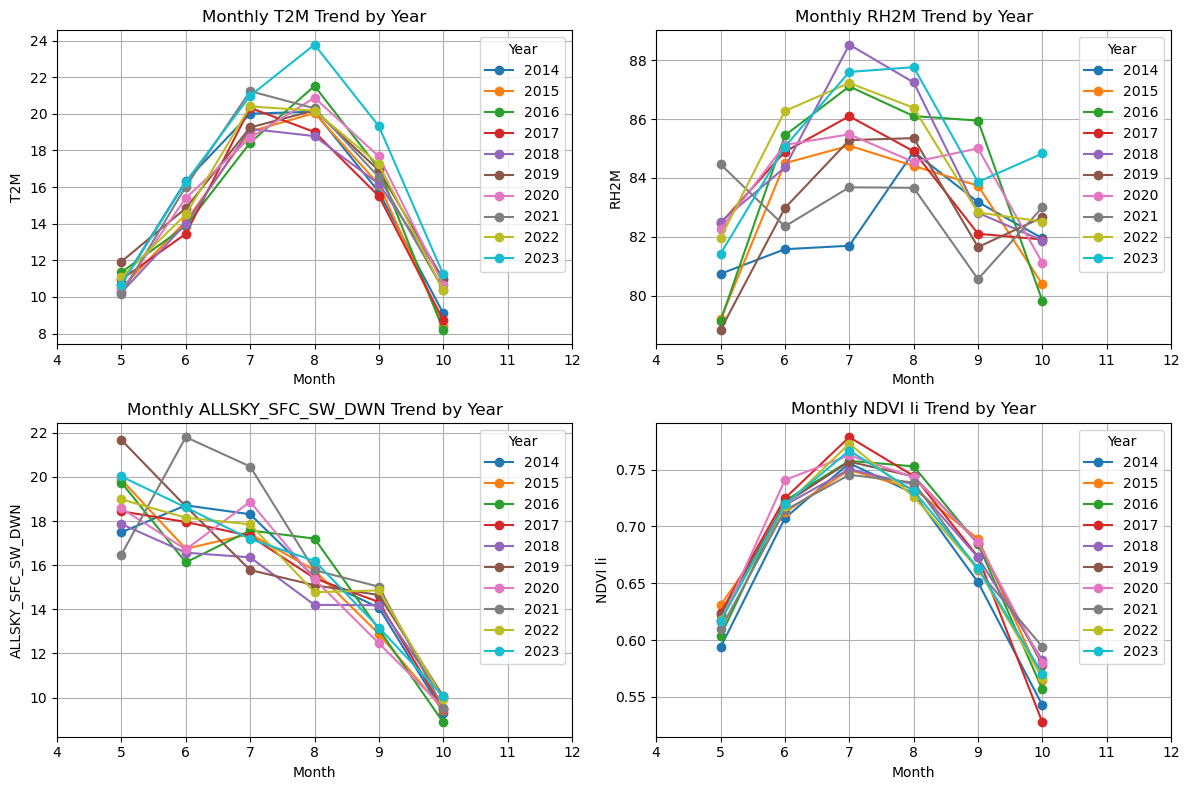

In [24]:
# Plot monthly trend of T2M for each year in the dataset
plt.figure(figsize=(12, 8))

# Weather data processing (unchanged)
weather_data = pd.read_csv("../datasets/hokkaido_weather_data.csv").copy()
filtered_weather_data = weather_data[(weather_data['month'] >= 5) & (weather_data['month'] <= 10)]
NDVI_data = pd.read_csv('../datasets/filtered_NDVI_data.csv').copy()

numeric_cols = ['T2M', 'RH2M', 'ALLSKY_SFC_SW_DWN']

# Process weather data
monthly_data = filtered_weather_data.groupby(['year', 'month'], as_index=False)[numeric_cols].mean()

# Process NDVI data - group by year and month
monthly_NDVI = NDVI_data.groupby(['year', 'month'], as_index=False)['NDVI_li'].mean()

# Plot weather variables
for i in range(3):
    plt.subplot(2, 2, i+1)
    for yr in sorted(monthly_data['year'].unique()):
        df_year = monthly_data[monthly_data['year'] == yr].sort_values('month')
        plt.plot(df_year['month'], df_year[numeric_cols[i]], marker='o', label=str(yr))
    
    plt.xlabel("Month")
    plt.ylabel(f"{numeric_cols[i]}")
    plt.title(f"Monthly {numeric_cols[i]} Trend by Year")
    plt.legend(title="Year")
    plt.xticks(range(4, 13))
    plt.grid(True)

# Plot NDVI - fixed version
plt.subplot(2, 2, 4)
for yr in sorted(monthly_NDVI['year'].unique()):
    df_year = monthly_NDVI[monthly_NDVI['year'] == yr].sort_values('month')
    plt.plot(df_year['month'], df_year['NDVI_li'], marker='o', label=str(yr))

plt.xlabel("Month")
plt.ylabel("NDVI li")
plt.title("Monthly NDVI li Trend by Year")
plt.legend(title="Year")
plt.xticks(range(4, 13))
plt.grid(True)

plt.tight_layout()
plt.show()

# Productivity by region
____________________

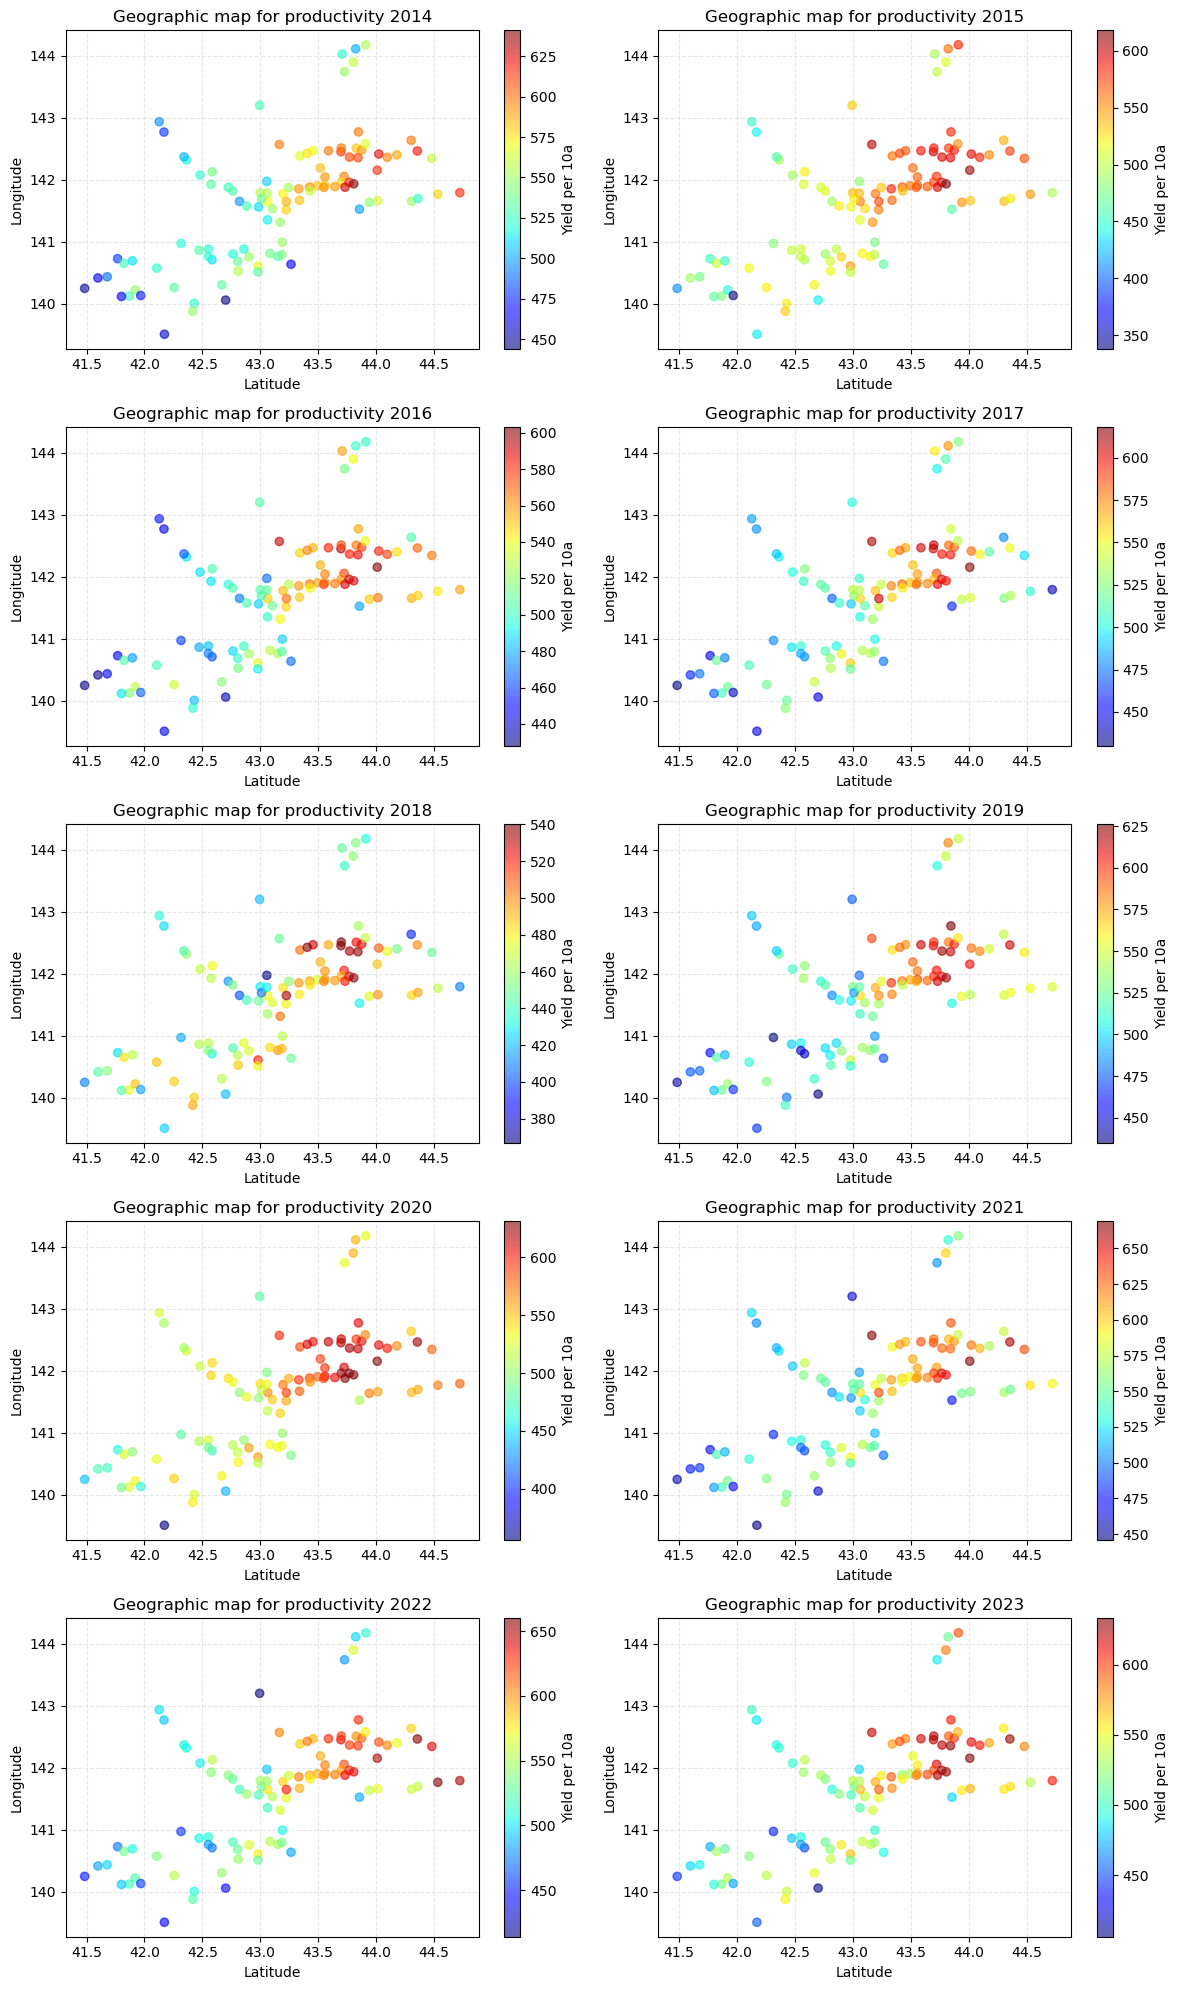

In [25]:
plt.figure(figsize=(12, 20))

years = sorted(weather_NDVI_harvest['year'].unique())

for i, yr in enumerate(years):
    plt.subplot(5, 2, i + 1)
    
    df_year = weather_NDVI_harvest[weather_NDVI_harvest['year'] == yr]
    scatter = plt.scatter(df_year["緯度"], df_year["経度"], alpha=0.6,
                          c=df_year["Productivity"], cmap="jet")

    plt.title(f"Geographic map for productivity {yr}", fontsize=12)
    plt.xlabel("Latitude", fontsize=10)
    plt.ylabel("Longitude", fontsize=10)
    plt.grid(alpha=0.3, linestyle='--')
    plt.colorbar(scatter, label="Yield per 10a")

plt.tight_layout()
plt.show()

In [26]:
# SAVE
weather_NDVI_harvest.to_csv("../datasets/weather_NDVI_harvest.csv", index=False)

# Historical Mean

In [27]:
def add_city_historical_mean_feature(df, year_predict):
    """
    Adds a feature representing the historical mean productivity per city
    for a given prediction year, avoiding lookahead bias.
    tuple (pd.DataFrame, pd.DataFrame): Modified training and test DataFrames with the new feature.
    """

    df_copy = df[df['year'] < year_predict].copy() #validation: 2020, 2021. Test: 2022, 2023. This avoid lookahead
    
    # Create a dictionary with the mean yield per city (no lookahead!)
    mean_yield_by_city = df_copy.groupby('市町村名')['Productivity'].mean().to_dict()

    # Assign the mean values directly to X_train, like a fit_transform
    df_copy['mean_productivity_city'] = df_copy['市町村名'].map(mean_yield_by_city)

    return df_copy

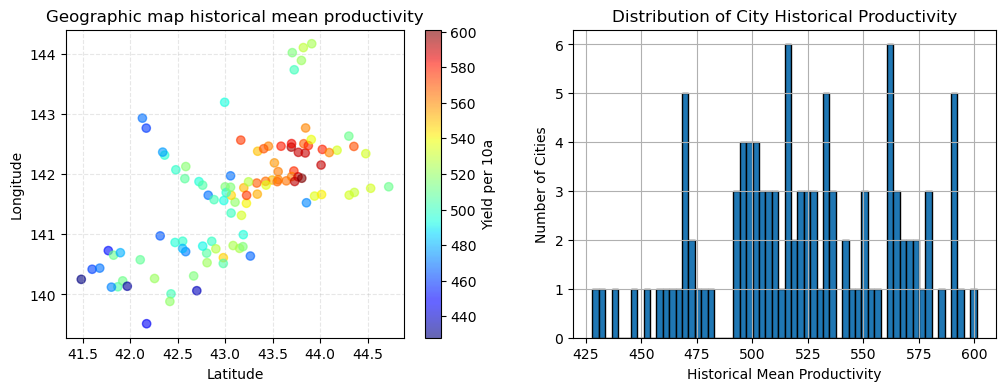

In [28]:
df_copy = add_city_historical_mean_feature(weather_NDVI_harvest, 2020)

# Seleciona apenas a primeira linha de cada cidade (não importa qual)
df_copy = df_copy.drop_duplicates(subset='市町村名')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
scatter = plt.scatter(df_copy["緯度"], df_copy["経度"], alpha=0.6,
                      c=df_copy["mean_productivity_city"], cmap="jet")

plt.title(f"Geographic map historical mean productivity", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Longitude", fontsize=10)
plt.grid(alpha=0.3, linestyle='--')
plt.colorbar(scatter, label="Yield per 10a")

plt.subplot(1, 2, 2)
df_copy['mean_productivity_city'].hist(bins=60, edgecolor='black')
plt.xlabel('Historical Mean Productivity')
plt.ylabel('Number of Cities')
plt.title('Distribution of City Historical Productivity')
plt.show()